In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml

from models.point import Point
from models.map import Map
from models.pose import Pose

from path_find_algorithms.A_star.A_star import AStar

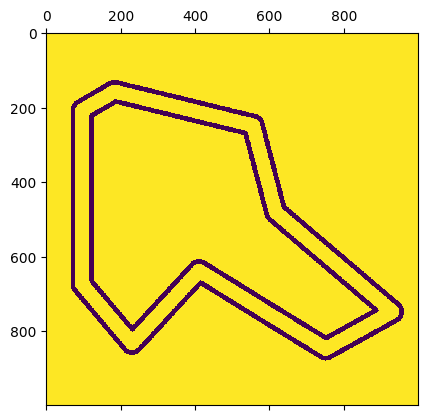

In [2]:
with open('../../../to_be_saved/occupancy_grid.npy', 'rb') as f:
    occupancy_grid = np.load(f)

with (open('../../../to_be_saved/occupancy_grid_info.yaml', 'rb')) as f:
    occupancy_grid_config = yaml.safe_load(f)

occupancy_grid_filtered = (occupancy_grid <30)*1
plt.matshow(occupancy_grid_filtered)

# For some reason the maps come with an resolution offset
resolution = occupancy_grid_config["resolution"]
map = Map(occupancy_grid_filtered, resolution, Point(occupancy_grid_config["origin_x"] - resolution, occupancy_grid_config["origin_y"] -resolution))

In [3]:
start = Point(200, 200)
print(map.grid[start.y, start.x])


goal = Point(300, 200)
print(map.grid[goal.y, goal.x])
path = AStar.find_path(start, goal, map.grid)

1
1
0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.4192639386039
100.4192639386039
100.41931547038602
100.41931547038602
100.41936806459529
100.41936806459529
100.41942175442901
100.41942175442901
100.41947657448206
100.41947657448206
100.41953256082125
100.41953256082125
100.41958975106446
100.41958975106446
100.41964818446485
100.41964818446485
100.41970790200074
100.41970790200074
100.41976894647146
100.41976894647146
100.41983136259961
100.41983136259961
100.41989519714029
100.41989519714029
100.41996049899792
100.41996049899792
100.42002731935118
100.42002731935118
100.42009571178673
100.42009571178673
100.42016573244257
100.42016573244257
100.42023744016163
100.42023744016163
100.42031089665672
100.42031089665672
100.42038616668763
100.42038616668763
100.42046331825154
100.42046331825154
100.42054242278782
100.42054242278782
100.42062355539866
100.4206235553986

KeyboardInterrupt: 